In [1]:
# Loading necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
%matplotlib inline

In [2]:
data_dir = 'N:\Datasets'

# Changing the current working directory

os.chdir(data_dir)

In [3]:
# Reading the dataset

data = pd.read_csv('pollution_india_2010.csv',na_values = 'Null')

In [4]:
# Checking for missing values

data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [5]:
# Returning dimensions of dataframe

data.shape

(181, 5)

In [6]:
# Dropping NaNs from dataframe

data = data.dropna()

In [7]:
data.shape

(175, 5)

In [8]:
# Returning data type of columns in dataframe

data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [9]:
data_pol = data.groupby('State',as_index = False)[['NO2','PM10','SO2']].agg(np.sum)

In [10]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [12]:
# Scaling the data

def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [13]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [14]:
data_scaled = np.array(data_scaled)

In [16]:
Z = linkage(data_scaled,method = "ward")

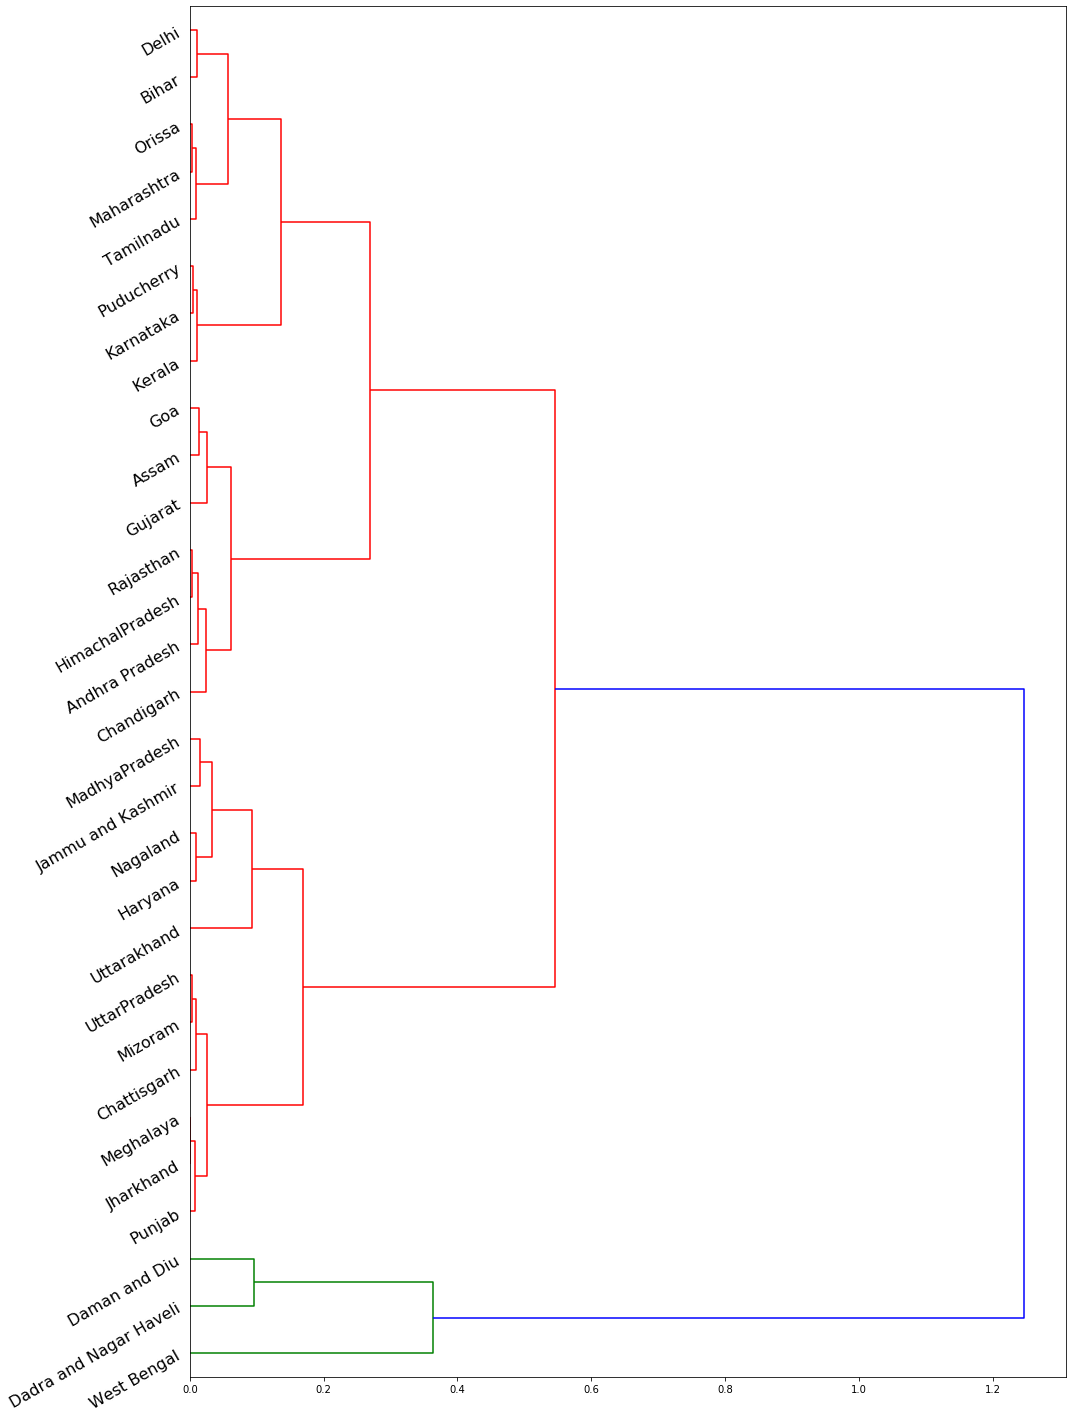

In [17]:
fig,ax = plt.subplots(figsize = (15,20))
ax = dendrogram(Z,orientation = "right",labels = np.array(data_pol['State']),leaf_rotation = 30,leaf_font_size = 16)
plt.tight_layout()
plt.show()